# Importing Libraries

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Loading the dataset

df = pd.read_csv('customers.csv')
X = df.iloc[:, [3,4]]
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Hierarchical clustering

## Dendrogram

Using Dendrogram/Bottom Up/Agglomarative approach to find the optimal value for number of clusters. It is starts with dividing n datapoints into n datapoints. While climbing to the top it finds the euclidean distance similarity of nth datapoint and matchs with one of existing n-1 clusters. This process repeats till 1 cluster is formed. 

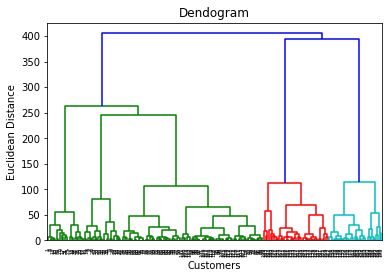

In [11]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

## Fitting hierarcial clustering to the dataset

In [14]:
from sklearn.cluster import AgglomerativeClustering
# Ward also called as called "minimum variance" method. Proximity between two clusters is the magnitude by 
# which the summed square in their joint cluster will be greater than the combined summed square in 
# these two clusters. It is a general linkage method that fits to all kinds of data.
hc = AgglomerativeClustering(n_clusters=5, affinity= 'euclidean', linkage='ward')
y_ = hc.fit(X)

## Visualizing the clusters

In [20]:
# Labels for the clusters
hc.labels_

df['predict'] = hc.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),predict
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [22]:
colors = ['red','green','blue','violet','cyan']

# map a color to the cluster_label(0,1,2,3,4) in the order of list taken the values from predict column.
df['color'] = df['predict'].map(lambda p: colors[p])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),predict,color
0,1,Male,19,15,39,4,cyan
1,2,Male,21,15,81,3,violet
2,3,Female,20,16,6,4,cyan
3,4,Female,23,16,77,3,violet
4,5,Female,31,17,40,4,cyan


<Figure size 504x504 with 0 Axes>

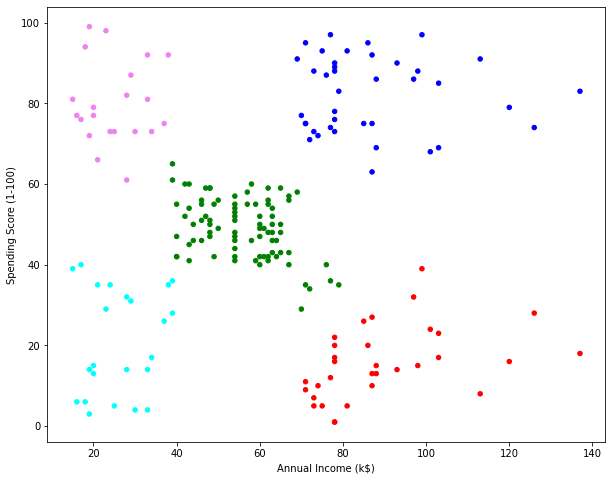

In [23]:
# plotting a scatter plot with the two attributes Annual Income, Spending Score with their respective color
plt.figure(figsize=(7,7))
ax = df.plot(kind = "scatter", x="Annual Income (k$)", y="Spending Score (1-100)", figsize=(10,8), c = df['color'])